In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gensim
import gensim.corpora as corpora

from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

from sklearn.model_selection import train_test_split
import timeit

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# change display options
#pd.set_option('display.max_columns', None)
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

## I. Topic predictions

### LDA

We try topic prediction with the Latent direichlet allocation that is a probabilistic model.

#### Create model

In [5]:
#import dataset
df = pd.read_pickle('./data/cleaned_data.pkl')

In [6]:
df.head()

,Body,Title,Tags,Preprocessed_text,Score
0,have table csv format that looks like t...,how pivot dataframe pandas,"[python, pandas, dataframe, transpose]",table csv format transpose table value indicat...,46
1,greets reading that the default behaviou...,uitableview with fixed section headers,"[ios, objective-c, uitableview]",greet read default behaviour uitableview pin s...,111
3,have installed react using create react ap...,load local images react,"[image, reactjs, local]",instal react create react app instal fine load...,70
4,are used say every r new user that ...,the apply family really not vectorized,"[r, performance, loops, vectorization, apply]",r user apply vectorize patrick burn r inferno ...,144
5,want add some leading zeroes string ...,add leading zeroes number dart,[dart],lead zero string example total length characte...,77


In [7]:
df.reset_index(inplace=True, drop=True)

In [8]:
data_cleaned = []
for i in range(df.shape[0]):
    data_cleaned.append(df['Preprocessed_text'][i].split())

In [9]:
#mapping between words and ids
dictionary = corpora.Dictionary(data_cleaned)

#filter on tokens
dictionary.filter_extremes(no_below=5, no_above=0.90, keep_n=3000)

# Print dictionary
#print(dictionary.token2id)

In [10]:
# Term Document Frequency
corpus = [dictionary.doc2bow(text) for text in data_cleaned]

In [11]:
print(corpus[0])

[(0, 1), (1, 3), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 4), (17, 3)]


In [12]:
import pyLDAvis
import pyLDAvis.gensim_models 

In [13]:
from gensim.models import TfidfModel

In [14]:
#create TF-IDF bag of words

model = TfidfModel(corpus) 
corpus = model[corpus]

In [15]:
# Look for the best number of topics : we calculate coherence score. 

scores = []

#t is the number of topics
for t in range(4, 30):    
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=t, 
                                           random_state=0,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, 
                                                       texts=data_cleaned, 
                                                       dictionary=dictionary, 
                                                       coherence='c_v')
    score = coherence_model_lda.get_coherence()
    scores.append(score)

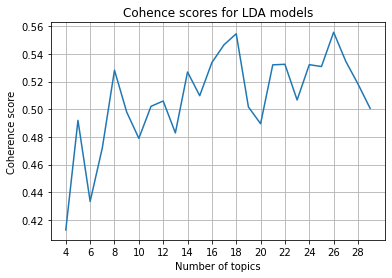

In [16]:
plt.plot(np.arange(4,30),scores)
plt.xticks(np.arange(4,30,2))
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.title('Cohence scores for LDA models')
plt.grid()

In [17]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=17, 
                                       random_state=0,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [18]:
#check coherence score
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=data_cleaned, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)

nCoherence Score:  0.5402846427453079


In [19]:
# See the topics
lda_model.print_topics(-1,num_words=30)

[(0,
  '0.033*"column" + 0.025*"panda" + 0.025*"dataframe" + 0.019*"col" + 0.019*"redirect" + 0.018*"csv" + 0.012*"numpy" + 0.012*"blank" + 0.011*"flask" + 0.011*"nuget" + 0.010*"row" + 0.010*"alpha" + 0.010*"apt" + 0.010*"sum" + 0.010*"frame" + 0.009*"datum" + 0.009*"nodejs" + 0.009*"gcc" + 0.009*"sizeof" + 0.008*"dataset" + 0.008*"user_id" + 0.008*"photo" + 0.008*"reverse" + 0.007*"agent" + 0.007*"index" + 0.007*"primary" + 0.007*"table" + 0.007*"drive" + 0.007*"overlap" + 0.007*"wrapper"'),
 (1,
  '0.020*"float" + 0.020*"cell" + 0.017*"center" + 0.016*"func" + 0.015*"border" + 0.014*"leave" + 0.014*"proxy" + 0.013*"image" + 0.012*"position" + 0.011*"pool" + 0.011*"camera" + 0.011*"align" + 0.011*"quote" + 0.010*"swift" + 0.010*"background" + 0.009*"arrow" + 0.009*"rate" + 0.008*"viewcontroller" + 0.008*"span" + 0.008*"procedure" + 0.008*"width" + 0.008*"left" + 0.008*"pop" + 0.007*"nil" + 0.007*"row" + 0.007*"nsstre" + 0.007*"listener" + 0.007*"height" + 0.007*"footer" + 0.007*"grid

In [20]:
pyLDAvis.enable_notebook()
plot=pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary,mds='tsne')
plot

PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
11      2.972113  -13.786730       1        1  26.792096
14     -7.288966   86.150291       2        1  18.595851
7      38.049393   65.587624       3        1  15.389603
12    -42.227043    6.162611       4        1   4.555888
5     -63.238548  -41.294518       5        1   3.737461
0     -48.099060   56.473579       6        1   3.391758
9     -48.087841  120.044159       7        1   3.281713
13     17.708776  131.640900       8        1   3.262763
1      92.846191   -8.328438       9        1   2.989907
16     47.892864  -45.589878      10        1   2.786143
10     92.039185   50.145565      11        1   2.419801
3     -94.766495   15.104293      12        1   2.369940
4      -9.109381  -64.732552      13        1   2.329109
6     -94.606842   77.712318      14        1   2.154078
15     44.945538   14.845922      15        1   2.121833
2      -1.493484   35.842178      16        1   2.106182
8      71.312836  105.574364      17        1   1.715876, topic_info=            Term        Freq       Total Category  logprob  loglift
710      android  116.000000  116.000000  Default  30.0000  30.0000
707         java   68.000000   68.000000  Default  29.0000  29.0000
1300        date   52.000000   52.000000  Default  28.0000  28.0000
1         column   51.000000   51.000000  Default  27.0000  27.0000
950        color   37.000000   37.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
262          exe    9.982819   15.324466  Topic17  -3.7015   3.6367
1717        gets    5.044292    8.176129  Topic17  -4.3841   3.5823
373   matplotlib    4.286203   10.339635  Topic17  -4.5470   3.1847
1771    constant    3.739793   10.839622  Topic17  -4.6833   3.0011
477    terminate    2.922804    5.357302  Topic17  -4.9298   3.4593

[817 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2639     11  0.329028        act
2639     15  0.658055        act
2098      8  0.831819  actionbar
945       1  0.892244     active
1468      1  0.178419   activity
...     ...       ...        ...
17        3  0.147195       year
17        4  0.515184       year
17        6  0.073598       year
1858     12  0.915542        zip
1575     10  0.776879       zone

[1407 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 15, 8, 13, 6, 1, 10, 14, 2, 17, 11, 4, 5, 7, 16, 3, 9])

In [21]:
#pyLDAvis.save_html(plot, 'lda.html')

#### Test model

In [22]:
#Import test data (50 posts randomly chosen)
d_test = pd.read_pickle('./data/test_data.pkl')
d_test.reset_index(drop=True, inplace=True)

In [23]:
d_test.head()

,Body,Title,Tags,Preprocessed_text,Score
0,fairly new spring excuse this ...,spring could not resolve placeholder,"[java, spring]",fairly spring excuse dumb launch program error...,30
1,now writing extractor for basic virtu...,how create directories automatically using ofs...,"[c++, filestream]",write extractor basic virtual file archive com...,30
2,this pseudo followup this question wh...,there way check column date r,[r],pseudo followup ggplot graph percentage datum ...,30
3,suppose have these tables create table ...,left join with condition,"[mysql, sql, tsql, left-join]",suppose table create table bug int primary key...,30
4,back the old days used write select st...,correct way select from two tables sql server ...,"[sql, sql-server, sql-server-2012]",old day write select statement select table co...,30


In [24]:
#Prepare test data
data_test = []
for i in range(d_test.shape[0]):
    data_test.append(df['Preprocessed_text'][i].split())

In [25]:
corpus_new = [dictionary.doc2bow(text) for text in data_test]

In [26]:
#prediction of topic number with weight
print(lda_model.get_document_topics(corpus_new[0]))

[(0, 0.31886595), (7, 0.48009053), (12, 0.174474)]


In [27]:
#prepare column for predicted topic number
d_test['LDA_prediction'] = int(0)

In [28]:
d_test.head()

,Body,Title,Tags,Preprocessed_text,Score,LDA_prediction
0,fairly new spring excuse this ...,spring could not resolve placeholder,"[java, spring]",fairly spring excuse dumb launch program error...,30,0
1,now writing extractor for basic virtu...,how create directories automatically using ofs...,"[c++, filestream]",write extractor basic virtual file archive com...,30,0
2,this pseudo followup this question wh...,there way check column date r,[r],pseudo followup ggplot graph percentage datum ...,30,0
3,suppose have these tables create table ...,left join with condition,"[mysql, sql, tsql, left-join]",suppose table create table bug int primary key...,30,0
4,back the old days used write select st...,correct way select from two tables sql server ...,"[sql, sql-server, sql-server-2012]",old day write select statement select table co...,30,0


In [29]:
#make prediction of topic number for each document
from operator import itemgetter
for i in range(len(corpus_new)):
    d_test.loc[i,'LDA_prediction']=max(lda_model.get_document_topics(corpus_new[i]), key=itemgetter(1))[0]

In [30]:
def main_tag(elt):
    ''' returns the most weighted token
    given topic number'''
    N=lda_model.get_topic_terms(elt, topn=30)[0][0]
    Topic=[key  for (key, value) in dictionary.token2id.items() if value == N]
    return Topic

In [31]:
d_test.head()

,Body,Title,Tags,Preprocessed_text,Score,LDA_prediction
0,fairly new spring excuse this ...,spring could not resolve placeholder,"[java, spring]",fairly spring excuse dumb launch program error...,30,7
1,now writing extractor for basic virtu...,how create directories automatically using ofs...,"[c++, filestream]",write extractor basic virtual file archive com...,30,16
2,this pseudo followup this question wh...,there way check column date r,[r],pseudo followup ggplot graph percentage datum ...,30,11
3,suppose have these tables create table ...,left join with condition,"[mysql, sql, tsql, left-join]",suppose table create table bug int primary key...,30,7
4,back the old days used write select st...,correct way select from two tables sql server ...,"[sql, sql-server, sql-server-2012]",old day write select statement select table co...,30,7


In [32]:
#Define main tag
d_test['LDA_prediction_tags'] = d_test['LDA_prediction'].apply(main_tag)

In [33]:
def tags_2(elt, text):
    
    '''returns words that are contained
    in the document text and in the topic 50 first words '''
    
    list_id=[x[0] for x in lda_model.get_topic_terms(elt, topn=50)]
    words_topic = []
    
    for word_id in list_id:
        Topic = [key  for (key, value) in dictionary.token2id.items() if value == word_id][0]
        words_topic.append(Topic)
        
    a = [w for w in words_topic if w in text.split()]
    return a

In [34]:
d_test.head()

,Body,Title,Tags,Preprocessed_text,Score,LDA_prediction,LDA_prediction_tags
0,fairly new spring excuse this ...,spring could not resolve placeholder,"[java, spring]",fairly spring excuse dumb launch program error...,30,7,[string]
1,now writing extractor for basic virtu...,how create directories automatically using ofs...,"[c++, filestream]",write extractor basic virtual file archive com...,30,16,[color]
2,this pseudo followup this question wh...,there way check column date r,[r],pseudo followup ggplot graph percentage datum ...,30,11,[app]
3,suppose have these tables create table ...,left join with condition,"[mysql, sql, tsql, left-join]",suppose table create table bug int primary key...,30,7,[string]
4,back the old days used write select st...,correct way select from two tables sql server ...,"[sql, sql-server, sql-server-2012]",old day write select statement select table co...,30,7,[string]


In [35]:
#Define other tags
d_test['LDA_predictions_tags2'] = d_test.apply(lambda x: tags_2(x.LDA_prediction, x.Preprocessed_text), axis=1)

In [36]:
d_test.head()

,Body,Title,Tags,Preprocessed_text,Score,LDA_prediction,LDA_prediction_tags,LDA_predictions_tags2
0,fairly new spring excuse this ...,spring could not resolve placeholder,"[java, spring]",fairly spring excuse dumb launch program error...,30,7,[string],"[string, value, int, return, class, public, ja..."
1,now writing extractor for basic virtu...,how create directories automatically using ofs...,"[c++, filestream]",write extractor basic virtual file archive com...,30,16,[color],[unsigned]
2,this pseudo followup this question wh...,there way check column date r,[r],pseudo followup ggplot graph percentage datum ...,30,11,[app],"[file, datum, set, type, return, input]"
3,suppose have these tables create table ...,left join with condition,"[mysql, sql, tsql, left-join]",suppose table create table bug int primary key...,30,7,[string],"[value, int, return, result]"
4,back the old days used write select st...,correct way select from two tables sql server ...,"[sql, sql-server, sql-server-2012]",old day write select statement select table co...,30,7,[string],"[value, list, type, method, example, datum, wr..."


In [37]:
def Union(lst1, lst2):
    ''' Union of two lists without repetition'''
    final_list = list(set(lst1) | set(lst2))
    return final_list

In [38]:
#Conclude all tags with LDA
d_test['LDA_prediction_tags'] = d_test.apply(lambda x: Union(x.LDA_prediction_tags, x.LDA_predictions_tags2), axis=1)
d_test.drop(['LDA_predictions_tags2'], axis=1, inplace=True)

In [39]:
d_test.head()

,Body,Title,Tags,Preprocessed_text,Score,LDA_prediction,LDA_prediction_tags
0,fairly new spring excuse this ...,spring could not resolve placeholder,"[java, spring]",fairly spring excuse dumb launch program error...,30,7,"[class, int, return, java, define, static, err..."
1,now writing extractor for basic virtu...,how create directories automatically using ofs...,"[c++, filestream]",write extractor basic virtual file archive com...,30,16,"[color, unsigned]"
2,this pseudo followup this question wh...,there way check column date r,[r],pseudo followup ggplot graph percentage datum ...,30,11,"[input, app, datum, file, return, type, set]"
3,suppose have these tables create table ...,left join with condition,"[mysql, sql, tsql, left-join]",suppose table create table bug int primary key...,30,7,"[int, result, string, return, value]"
4,back the old days used write select st...,correct way select from two tables sql server ...,"[sql, sql-server, sql-server-2012]",old day write select statement select table co...,30,7,"[datum, write, method, list, string, example, ..."


### Test on particular questions

In [40]:
from functions import *

C:\Users\celine\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
C:\Users\celine\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
C:\Users\celine\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:43: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descripto

C:\Users\celine\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:513: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.object,
C:\Users\celine\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.bool,
C:\Users\celine\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:555: DeprecationWarning: `np.object` is a depr

In [41]:
def predict_lda(text):
    ''' predicts tags obtaned with lda model'''
    #clean text
    text = clean_text(text)
    text = remove_stop_words(text)
    text = lemmatize(text)
    
    #make prediction
    corpus = dictionary.doc2bow(text.split())
    num_topic = max(lda_model.get_document_topics(corpus),
                    key=itemgetter(1))[0]
    m_tag = main_tag(num_topic)
    other_tags = tags_2(num_topic, text)
    a = Union(m_tag, other_tags)
    
    return a

In [42]:
#https://stackoverflow.com/questions/273192/how-can-i-safely-create-a-nested-directory
text1 ="""How can I safely create a nested directory?
        What is the most elegant way to check if the directory a file is going to be written to exists, 
        and if not, create the directory using Python? Here is what I tried:
        import os\ file_path ="/my/directory/filename.txt" 
        directory = os.path.dirname(file_path) 
        try: 
        os.stat(directory) 
        except: 
        os.mkdir(directory) 
        f = file(filename) 
        Somehow, I missed os.path.exists (thanks kanja, Blair, and Douglas). This is what I have now: 
        def ensure_dir(file_path): 
        directory = os.path.dirname(file_path) 
        if not os.path.exists(directory): 
        os.makedirs(directory) 
        Is there a flag for open(), that makes this happen automatically?"""

<>:2: DeprecationWarning: invalid escape sequence \ 
<>:2: DeprecationWarning: invalid escape sequence \ 
C:\Users\celine\AppData\Local\Temp/ipykernel_13904/211915831.py:2: DeprecationWarning: invalid escape sequence \ 
  text1 ="""How can I safely create a nested directory?


In [43]:
predict_lda(text1)

['python', 'create', 'file', 'open', 'directory', 'path', 'import']

In [44]:
#https://stackoverflow.com/questions/509211/understanding-slice-notation
text2 = """I need a good explanation (references are a plus) on Python's slice notation.
To me, this notation needs a bit of picking up.
It looks extremely powerful, but I haven't quite got my head around it."""

In [45]:
predict_lda(text2)

['python', 'string']

In [46]:
#https://stackoverflow.com/questions/1642028/what-is-the-operator-in-c-c
text3 = """After reading Hidden Features and Dark Corners of C++/STL on comp.lang.c++.moderated, 
I was completely surprised that the following snippet compiled and worked in both Visual Studio 2008 and G++ 4.4.
Here's the code:

#include <stdio.h>
int main()
{
    int x = 10;
    while (x --> 0) // x goes to 0
    {
        printf("%d ", x);
    }
}
Output:

9 8 7 6 5 4 3 2 1 0
I'd assume this is C, since it works in GCC as well. Where is this defined in the standard, and where has it come from?"""

In [47]:
predict_lda(text3)

['int', 'c++', 'string', 'define', 'c']

### NMF

We try topic prediction with the non negative matrix factorization that is a linear algebra model.

In [48]:
#df = pd.read_pickle('./data/cleaned_data.pkl')
#df.reset_index(drop=True, inplace=True)

In [49]:
documents = []
for i in range(df.shape[0]):
    documents.append(df['Preprocessed_text'][i])

In [50]:
from sklearn.decomposition import NMF

In [51]:
#preprocessing
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, 
                                   min_df=2, 
                                   stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(documents)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [52]:
# alpha=0 means no regularization, l1_ratio=.5, the penalty is a combination of L1 and L2
# Run NMF
nmf = NMF(n_components=18, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf.fit(tfidf)


NMF(alpha=0.1, init='nndsvd', l1_ratio=0.5, n_components=18, random_state=1)

In [53]:
def display_topics(model, feature_names, no_top_words):
    '''display topics and associated words'''
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [54]:
#Topics for nmf models
display_topics(nmf, tfidf_feature_names, 15)

Topic 0:
error user run request server test web application api net url project log work window
Topic 1:
android studio layout_width com layout_height wrap_content activity layout xml support gradle item match_parent sdk widget
Topic 2:
file directory folder line project path open txt command upload create text copy bash include
Topic 3:
string convert object json public stre format str number character return char contain method split
Topic 4:
git branch commit master push repository github merge remote origin pull repo rebase local clone
Topic 5:
table sql query select key database mysql create row field primary foreign column server schema
Topic 6:
class public static method type extend href object span bootstrap btn override col constructor model
Topic 7:
function return var datum console javascript log jquery scope react test component object method event
Topic 8:
date day datetime month format year time hour convert number timestamp return datepicker iso end
Topic 9:
python line 

In [55]:
def tags_nmf(text):
        '''Suggests a tag given a text'''
        #clean text
        text = clean_text(text)
        text = remove_stop_words(text)
        text = lemmatize(text)
         
        #apply tfidf transformation
        tfidf_new = tfidf_vectorizer.transform([text])
        X_new = nmf.transform(tfidf_new)
        
        #predict topic number
        predicted_topics = [np.argsort(each)[::-1][0] for each in X_new][0]
        
        main_tag = [tfidf_feature_names[nmf.components_[predicted_topics].argsort()[:-2:-1][0]]]
        other_tags = [tfidf_feature_names[i] for i in nmf.components_[predicted_topics].argsort()[:-51:-1]
                      if (tfidf_feature_names[i] in text.split())]
        return Union(main_tag, other_tags)

In [56]:
tags_nmf(text1)

['txt',
 'create',
 'filename',
 'write',
 'file',
 'open',
 'directory',
 'path',
 'import']

In [57]:
tags_nmf(text2)

['python']

In [58]:
tags_nmf(text3)

['int', 'main', 'printf', 'include', 'compile', 'gcc']

In [59]:
d_test['NMF_prediction'] = d_test['Preprocessed_text'].apply(tags_nmf)

### II. Multi-label classification

In [60]:
#import dataset
df = pd.read_pickle('./data/cleaned_data.pkl')
df.reset_index(drop=True, inplace=True)

In [61]:
df.head()

,Body,Title,Tags,Preprocessed_text,Score
0,have table csv format that looks like t...,how pivot dataframe pandas,"[python, pandas, dataframe, transpose]",table csv format transpose table value indicat...,46
1,greets reading that the default behaviou...,uitableview with fixed section headers,"[ios, objective-c, uitableview]",greet read default behaviour uitableview pin s...,111
2,have installed react using create react ap...,load local images react,"[image, reactjs, local]",instal react create react app instal fine load...,70
3,are used say every r new user that ...,the apply family really not vectorized,"[r, performance, loops, vectorization, apply]",r user apply vectorize patrick burn r inferno ...,144
4,want add some leading zeroes string ...,add leading zeroes number dart,[dart],lead zero string example total length characte...,77


In [62]:
df.shape

(6252, 5)

In [63]:
# Find all tags
all_tags = []
for i in range(df.shape[0]):
    all_tags += df.iloc[i, df.columns.get_loc('Tags')]

In [64]:
# Remove tags that are too rare and define new tags
t = Counter(all_tags)
L = []
L_test = []
for k in range(df.shape[0]):
    L.append([elt for elt in df.iloc[k, df.columns.get_loc('Tags')] if (t[elt] >= 60)])
    
for k in range(d_test.shape[0]):
    L_test.append([elt for elt in d_test.iloc[k, d_test.columns.get_loc('Tags')] if (t[elt] >= 60)])
    
df['new_tags'] = pd.Series(L)
d_test['new_tags'] = pd.Series(L_test)

In [65]:
df.head(30)

,Body,Title,Tags,Preprocessed_text,Score,new_tags
0,have table csv format that looks like t...,how pivot dataframe pandas,"[python, pandas, dataframe, transpose]",table csv format transpose table value indicat...,46,"[python, pandas]"
1,greets reading that the default behaviou...,uitableview with fixed section headers,"[ios, objective-c, uitableview]",greet read default behaviour uitableview pin s...,111,"[ios, objective-c]"
2,have installed react using create react ap...,load local images react,"[image, reactjs, local]",instal react create react app instal fine load...,70,[reactjs]
3,are used say every r new user that ...,the apply family really not vectorized,"[r, performance, loops, vectorization, apply]",r user apply vectorize patrick burn r inferno ...,144,[r]
4,want add some leading zeroes string ...,add leading zeroes number dart,[dart],lead zero string example total length characte...,77,[]
5,work with conda environments and need some ...,combining conda environment yml with pip requi...,"[python, pip, anaconda, conda]",work conda environment pip package pre compile...,163,[python]
6,does anyone know how install gitk mac ...,install gitk mac,"[git, macos, osx-mountain-lion, gitk]",install gitk mac official website gitk come gi...,281,[git]
7,have bunch rpm files folder tr...,how ignore conflicts rpm installs,"[linux, unix, rpm, aix]",bunch rpm file folder install rpm ivh rpm rpm ...,42,[linux]
8,the find command does completely different ...,how execute bat file from cygwin bash that use...,"[batch-file, cygwin]",command completely different window unix windo...,42,[]
9,test bit linux with gcc w...,why gcc compiled c program needs eh_frame sect...,"[c, assembly, exception-handling, x86, elf]",test bit linux gcc gcc compile c program reade...,57,[c]


In [66]:
# Remove rows with missing new tags
df = df[df['new_tags'].apply(lambda x: len(x) != 0)]
df.reset_index(inplace=True, drop=True)

In [67]:
# Preprocess text data
X=df.Preprocessed_text.values.tolist()
y = df.new_tags

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [68]:
# Use tf-idf
vectorizer = TfidfVectorizer(min_df = 0.005, max_df=0.90,sublinear_tf=True)
vectorised_train_documents = vectorizer.fit_transform(X_train).toarray()
vectorised_test_documents = vectorizer.transform(X_test).toarray()

In [69]:
#Use multilabelbinarizer on targets
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
train_labels = mlb.fit_transform(y_train)
test_labels = mlb.transform(y_test)

#### Use multi-label classifiers

In [70]:
#KNN multi label classifier
from sklearn.neighbors import KNeighborsClassifier

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = {'n_neighbors':np.arange(1,21)}

In [73]:
score = 'accuracy'

In [74]:
clf = GridSearchCV(KNeighborsClassifier(),
                   param_grid,     
                   cv=5,           
                   scoring=score)   

clf.fit(vectorised_train_documents, train_labels)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='accuracy')

In [75]:
print(clf.best_params_)

{'n_neighbors': 3}


In [76]:
#prediction on test set
knnPredictions = clf.predict(vectorised_test_documents)

In [77]:
knnPredictions

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [78]:
mlb.inverse_transform(knnPredictions)[:10]

[('c#',),
 ('sql',),
 ('javascript',),
 (),
 ('css',),
 ('android',),
 ('css',),
 ('javascript',),
 ('css', 'html'),
 ('javascript',)]

In [79]:
dg=pd.DataFrame(index=['KNN'], columns=[])

In [80]:
from sklearn.metrics import accuracy_score, f1_score

In [81]:
def input_scores(model_name, prediction, dg):
    '''add model scores in a dataframe dg'''
    dg.loc[model_name, 'macro_f1'] = f1_score(test_labels, prediction, average='macro')
    dg.loc[model_name, 'micro_f1'] = f1_score(test_labels, prediction, average='micro')
    dg.loc[model_name, 'accuracy'] = accuracy_score(prediction,test_labels)
    return dg

In [82]:
dg = input_scores('KNN', knnPredictions, dg)

In [83]:
dg

,macro_f1,micro_f1,accuracy
KNN,0.490787,0.557951,0.353955


#### Problem transformation : use binary classifiers and binary relevance

In [84]:
from skmultilearn.problem_transform import BinaryRelevance

In [85]:
#Naive Bayes 

from sklearn.naive_bayes import MultinomialNB

nbClassifier = BinaryRelevance(MultinomialNB())
nbClassifier.fit(vectorised_train_documents, train_labels)
nbPreds = nbClassifier.predict(vectorised_test_documents)

In [86]:
dg = input_scores('Naive Bayes', nbPreds, dg)

In [87]:
# Support vector classification

from sklearn.svm import LinearSVC

svmClassifier = BinaryRelevance(LinearSVC())
svmClassifier.fit(vectorised_train_documents, train_labels)
svmPreds = svmClassifier.predict(vectorised_test_documents)

In [88]:
dg = input_scores('Linear SVC', svmPreds, dg)

In [89]:
#too long
#svmClassifier = BinaryRelevance(SVC(kernel='rbf'))
#svmClassifier.fit(vectorised_train_documents, train_labels)
#svmPreds = svmClassifier.predict(vectorised_test_documents)
#print(accuracy_score(svmPreds,test_labels))

In [90]:
dg

,macro_f1,micro_f1,accuracy
KNN,0.490787,0.557951,0.353955
Naive Bayes,0.116853,0.294155,0.160243
Linear SVC,0.608758,0.689837,0.451318


We choose lienar svc model.

In [91]:
import joblib

In [92]:
def predict_multi_labels(text):
    '''prediction with svm model'''
    vect = vectorizer.transform([text]).toarray()
    return mlb.inverse_transform(svmClassifier.predict(vect))
    

In [93]:
start_time = timeit.default_timer()

a = predict_multi_labels(text1)
elapsed = timeit.default_timer() - start_time

print(a)
print(elapsed)

[('python',)]
0.04020999999988817


In [94]:
predict_multi_labels(text2)

[('python',)]

In [95]:
predict_multi_labels(text3)

[('c', 'c++')]

#### PCA with multilabel classifier

In [96]:
# Apply PCA before SVC model
from sklearn import decomposition

pca = decomposition.PCA(n_components=500)
pca.fit(vectorised_train_documents)
vectorised_train_documents = pca.transform(vectorised_train_documents)
vectorised_test_documents = pca.transform(vectorised_test_documents)


In [97]:
svmClassifier2 = BinaryRelevance(LinearSVC())
svmClassifier2.fit(vectorised_train_documents, train_labels)

BinaryRelevance(classifier=LinearSVC(), require_dense=[True, True])

In [98]:
svmPreds2 = svmClassifier2.predict(vectorised_test_documents)

In [99]:
dg = input_scores('(PCA)Linear SVC', svmPreds2, dg)

In [100]:
dg

,macro_f1,micro_f1,accuracy
KNN,0.490787,0.557951,0.353955
Naive Bayes,0.116853,0.294155,0.160243
Linear SVC,0.608758,0.689837,0.451318
(PCA)Linear SVC,0.591399,0.686860,0.451318


In [101]:
vect = vectorizer.transform([text1]).toarray()
vect = pca.transform(vect)

start_time = timeit.default_timer()

a = mlb.inverse_transform(svmClassifier2.predict(vect))

elapsed = timeit.default_timer() - start_time
print(a)
print(elapsed)

[('python',)]
0.08801229999994575


In [102]:
vect = vectorizer.transform([text1]).toarray()

start_time = timeit.default_timer()

a = mlb.inverse_transform(svmClassifier.predict(vect))

elapsed = timeit.default_timer() - start_time
print(a)
print(elapsed)

[('python',)]
0.036827600000151506


In [103]:
def predict_multi_labels2(text):
    '''prediction with svm model, applying PCA to text'''
    vect = vectorizer.transform([text]).toarray()
    pca.transform(vect)
    return mlb.inverse_transform(svmClassifier.predict(vect))

In [104]:
predict_multi_labels2(text1)

[('python',)]

In [105]:
predict_multi_labels2(text2)

[('python',)]

In [106]:
predict_multi_labels2(text3)

[('c', 'c++')]

In [107]:
d_test['Multi_label_classfication'] = d_test['Preprocessed_text'].apply(predict_multi_labels2)

In [108]:
d_test.head()

,Body,Title,Tags,Preprocessed_text,Score,LDA_prediction,LDA_prediction_tags,NMF_prediction,new_tags,Multi_label_classfication
0,fairly new spring excuse this ...,spring could not resolve placeholder,"[java, spring]",fairly spring excuse dumb launch program error...,30,7,"[class, int, return, java, define, static, err...","[class, create, public, define, property, stat...","[java, spring]","[(java, spring)]"
1,now writing extractor for basic virtu...,how create directories automatically using ofs...,"[c++, filestream]",write extractor basic virtual file archive com...,30,16,"[color, unsigned]","[txt, create, save, read, write, file, directo...",[c++],[()]
2,this pseudo followup this question wh...,there way check column date r,[r],pseudo followup ggplot graph percentage datum ...,30,11,"[input, app, datum, file, return, type, set]","[format, input, return, date, convert]",[r],"[(r,)]"
3,suppose have these tables create table ...,left join with condition,"[mysql, sql, tsql, left-join]",suppose table create table bug int primary key...,30,7,"[int, result, string, return, value]","[create, column, key, table, insert, row, varc...","[mysql, sql]",[()]
4,back the old days used write select st...,correct way select from two tables sql server ...,"[sql, sql-server, sql-server-2012]",old day write select statement select table co...,30,7,"[datum, write, method, list, string, example, ...","[create, column, datum, table, server, stateme...",[sql],"[(sql,)]"


In [109]:
#d_test.to_excel('./data/test.xlsx')

In [110]:
d_test[['Body','Title','Tags','LDA_prediction_tags', 'NMF_prediction', 'Multi_label_classfication', 'new_tags']].to_excel('./data/test.xlsx')